In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neurolib.models.aln import ALNModel
from neurolib.control.optimal_control.oc_aln import oc_aln
from neurolib.control.optimal_control.oc_utils.plot_oc import plot_oc_singlenode

def getfinalstate(model):
    N = model.params.Cmat.shape[0]
    V = len(model.state_vars)
    T = model.getMaxDelay() + 1
    state = np.zeros((N, V, T))
    for v in range(V):
        if "rates" in model.state_vars[v] or "IA" in model.state_vars[v]:
            for n in range(N):
                state[n, v, :] = model.state[model.state_vars[v]][n, -T:]
        else:
            for n in range(N):
                state[n, v, :] = model.state[model.state_vars[v]][n]
    return state

def setinitstate(model, state):
    N = model.params.Cmat.shape[0]
    V = len(model.init_vars)
    T = model.getMaxDelay() + 1

    for n in range(N):
        for v in range(V):
            if "rates" in model.init_vars[v] or "IA" in model.init_vars[v]:
                model.params[model.init_vars[v]] = state[:, v, -T:]
            else:
                model.params[model.init_vars[v]] = state[:, v, -1]

    return

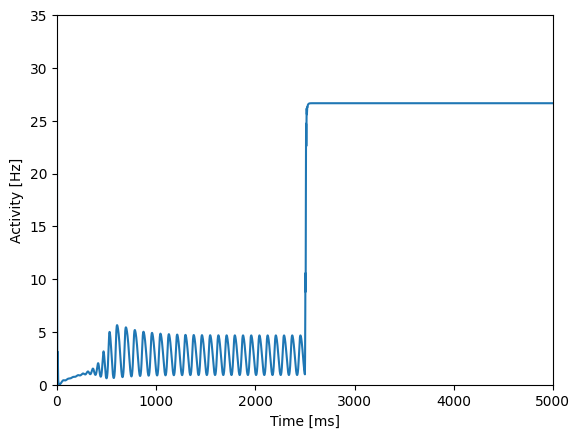

In [2]:
aln = ALNModel()

aln.params.mue_ext_mean = 2.
aln.params.mui_ext_mean = 1.5
dur = 5000.
aln.params.duration = dur
dt = aln.params.dt

input = np.zeros((1, 1+int(dur/dt)))
input[0,int(dur/dt/2):int(dur/dt/2)+50] = 1.0   ####### -1 also works
aln.params.ext_exc_current = input
aln.run()

plt.plot(np.arange(0,dur,dt), aln.rates_exc[0,:])
plt.ylim(0,35)
plt.xlim(0,dur)
plt.ylabel("Activity [Hz]")
plt.xlabel("Time [ms]")
plt.show()

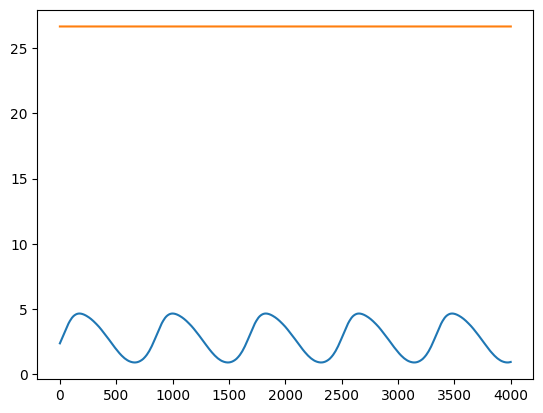

In [3]:
dur_controlled = 400.
target = np.zeros((1,3,int(dur_controlled/dt)+1))
target[0,0,:] = aln.rates_exc[0,-1]

aln.params.ext_exc_current = 0. * input
aln.run()
setinitstate(aln, getfinalstate(aln))
aln.params.duration = dur_controlled
aln.run()

control_mat = np.ones((1,2))
cost_mat = np.zeros((1,3))
cost_mat[0,0] = 1.

plt.plot(aln.rates_exc[0,:])
plt.plot(target[0,0,:])

Optimal control with target time series
Compute control for a deterministic system
Cost in iteration 0: 29359.450598010386
Final cost : 22836.18163325581


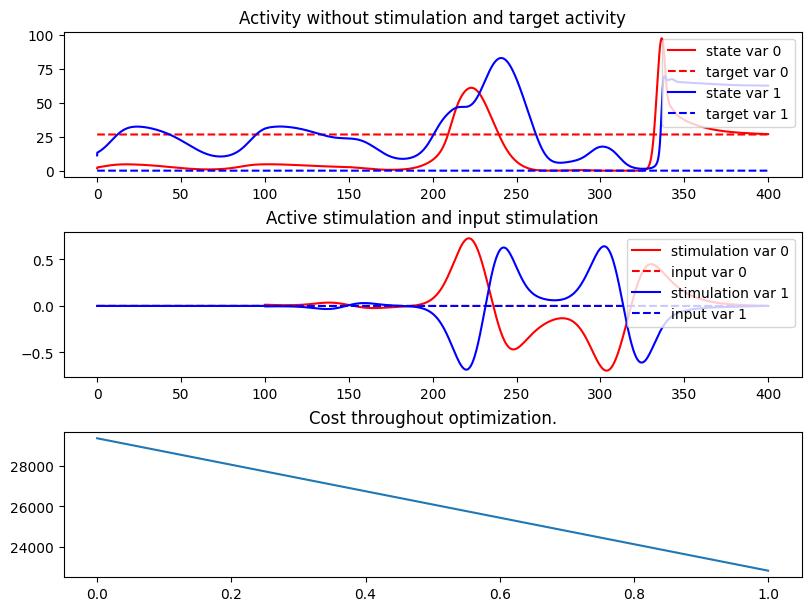

In [4]:
aln_oc = oc_aln.OcAln(aln,
                      target,
                      print_array=np.arange(0,1001,10),
                      cost_interval=(3000,None), control_interval=(1000, None),
                      control_matrix=control_mat, cost_matrix=cost_mat, )

aln_oc.weights["w_p"] = 1. # default value 1
aln_oc.weights["w_2"] = 1. # default value 0

aln_oc.optimize(1)

state = aln_oc.get_xs()
control = aln_oc.control

plot_oc_singlenode(dur_controlled, dt, state, target, control, np.zeros((target.shape)), aln_oc.cost_history)

Compute control for a deterministic system
Cost in iteration 0: 22836.18163325581
Cost in iteration 10: 10101.34162072184
Cost in iteration 20: 9429.55506727919
Cost in iteration 30: 8858.505529414748
Cost in iteration 40: 8396.862586361744
Cost in iteration 50: 7945.249403356309
Cost in iteration 60: 7482.098820904961
Cost in iteration 70: 7013.349898732178
Cost in iteration 80: 6462.108868071008
Cost in iteration 90: 719.2085146627974
Cost in iteration 100: 16.21343767876827
Final cost : 16.21343767876827


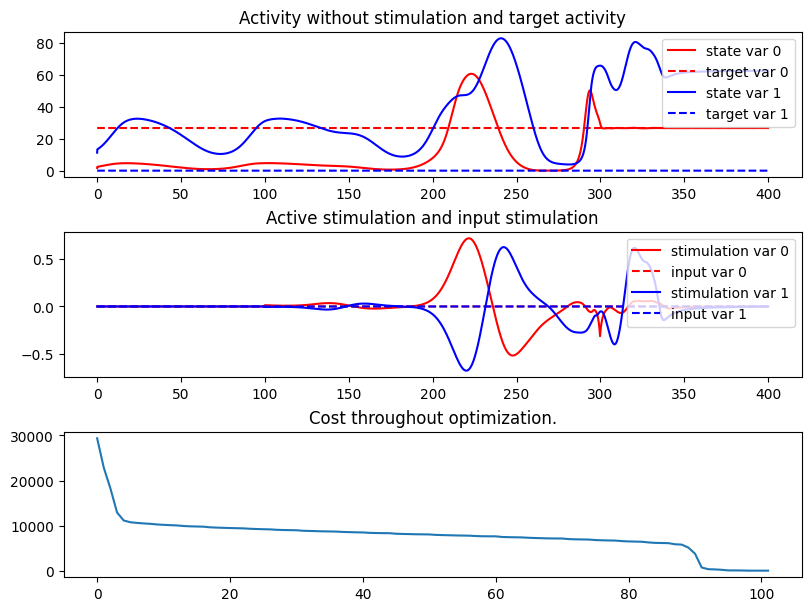

In [5]:
aln_oc.optimize(100)
state = aln_oc.get_xs()
control = aln_oc.control
plot_oc_singlenode(dur_controlled, dt, state, target, control, np.zeros((target.shape)), aln_oc.cost_history)

Compute control for a deterministic system
Cost in iteration 0: 4.732836303858079
Cost in iteration 10: 4.719077684603068
Cost in iteration 20: 4.705815042800181
Cost in iteration 30: 4.692423207911995
Cost in iteration 40: 4.6804159266953835
Cost in iteration 50: 4.667632912160598
Cost in iteration 60: 4.655685987217379
Cost in iteration 70: 4.642453407535237
Cost in iteration 80: 4.63153314057179
Cost in iteration 90: 4.619317091859246
Cost in iteration 100: 4.607786429878342
Cost in iteration 110: 4.596803297743808
Cost in iteration 120: 4.586581701144788
Cost in iteration 130: 4.5748221368425135
Cost in iteration 140: 4.565477752872038
Cost in iteration 150: 4.554630444821563
Cost in iteration 160: 4.544534676725122
Cost in iteration 170: 4.535060333974634
Cost in iteration 180: 4.526749086244685
Cost in iteration 190: 4.512618108184176
Cost in iteration 200: 4.505191043848989
Cost in iteration 210: 4.493619719251501
Cost in iteration 220: 4.479688381991528
Cost in iteration 230: 4

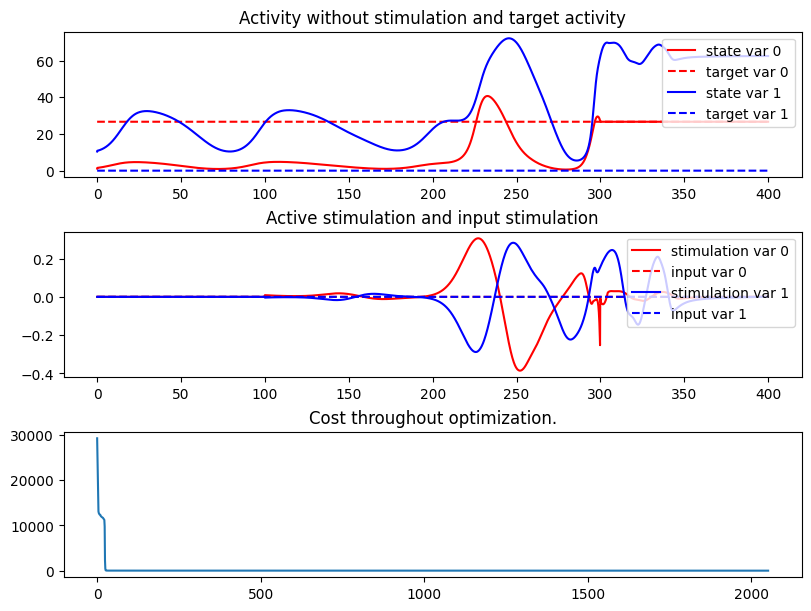

In [7]:
aln_oc.optimize(1000)
state = aln_oc.get_xs()
control = aln_oc.control
plot_oc_singlenode(dur_controlled, dt, state, target, control, np.zeros((target.shape)), aln_oc.cost_history)